# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Chr X vs Chr X q22 deletion

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
iterationNumber = 6

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_x': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-10L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-15L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-16L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-17L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p2

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_x': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-10L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-11L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-12L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-13L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-14L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-15L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-16L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-17L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-18L.bmp',
 

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
type(X_train_name)

dict

In [7]:
X_train_name.keys()

dict_keys(['chr_x', 'chr_x_q22_deletion'])

In [8]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  6
chr_x
   Train: 
        191128-del(X)(p22)-10L.bmp
        191128-del(X)(p22)-11L.bmp
        191128-del(X)(p22)-12L.bmp
        191128-del(X)(p22)-13L.bmp
        191128-del(X)(p22)-14L.bmp
        191128-del(X)(p22)-15L.bmp
        191128-del(X)(p22)-16L.bmp
        191128-del(X)(p22)-18L.bmp
        191128-del(X)(p22)-19L.bmp
        191128-del(X)(p22)-1L.bmp
        191128-del(X)(p22)-20L.bmp
        191128-del(X)(p22)-21L.bmp
        191128-del(X)(p22)-22L.bmp
        191128-del(X)(p22)-2L.bmp
        191128-del(X)(p22)-3L.bmp
        191128-del(X)(p22)-4L.bmp
        191128-del(X)(p22)-6L.bmp
        191128-del(X)(p22)-7L.bmp
        191128-del(X)(p22)-8L.bmp
        192478-delXq21-10L.bmp
        192478-delXq21-11L.bmp
        192478-delXq21-12L.bmp
        192478-delXq21-13L.bmp
        192478-delXq21-15L.bmp
        192478-delXq21-16L.bmp
        192478-delXq21-17L.bmp
        192478-delXq21-18L.bmp
        192478-delXq21-19L.bmp
        192478-delXq21-1L.bmp

### 3.1.1. Helper Functions

In [9]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [10]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [11]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [12]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [13]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [14]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [15]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [16]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [17]:
chromConvert = {
               'chr_x': 0, 
               'chr_x_q22_deletion': 1
               }

In [18]:
chromConvert_reverse = {
                0: 'chr_x', 
                1: 'chr_x_q22_deletion'
               }

In [19]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [20]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [21]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [22]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [23]:
len(X_train)

198

In [24]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [25]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [28]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

### 3.2.4. Tensorboard Initilization

In [29]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### 3.2.5. Compile the modal

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [31]:
model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/500
4/4 [==============================] - 5s 559ms/step - loss: 3332.2363 - accuracy: 0.4242 - val_loss: 405.2257 - val_accuracy: 0.8438
Epoch 2/500
4/4 [==============================] - 0s 120ms/step - loss: 354.9018 - accuracy: 0.8182 - val_loss: 104.0370 - val_accuracy: 0.1562
Epoch 3/500
4/4 [==============================] - 0s 103ms/step - loss: 33.0213 - accuracy: 0.6162 - val_loss: 9.4546 - val_accuracy: 0.8438
Epoch 4/500
4/4 [==============================] - 0s 106ms/step - loss: 14.7936 - accuracy: 0.8182 - val_loss: 3.5263 - val_accuracy: 0.8438
Epoch 5/500
4/4 [==============================] - 0s 114ms/step - loss: 9.1737 - accuracy: 0.6061 - val_loss: 2.6220 - val_accuracy: 0.8438
Epoch 6/500
4/4 [==============================] - 0s 116ms/step - loss: 3.6786 - accuracy: 0.6263 - val_loss: 4.9509 - val_accuracy: 0.1562
Epoch 7/500
4/4 [==============================] - 0s 110ms/step - loss: 3.3060 - accuracy: 0.5960 - val_loss: 0.9522 - val_accuracy: 0.8438
Ep

Epoch 59/500
4/4 [==============================] - 0s 108ms/step - loss: 0.0358 - accuracy: 0.9899 - val_loss: 0.2259 - val_accuracy: 0.8750
Epoch 60/500
4/4 [==============================] - 0s 110ms/step - loss: 0.0308 - accuracy: 0.9949 - val_loss: 0.0862 - val_accuracy: 0.9688
Epoch 61/500
4/4 [==============================] - 0s 113ms/step - loss: 0.0240 - accuracy: 0.9949 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 62/500
4/4 [==============================] - 0s 111ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0335 - val_accuracy: 0.9688
Epoch 63/500
4/4 [==============================] - 0s 108ms/step - loss: 0.0101 - accuracy: 0.9949 - val_loss: 0.0273 - val_accuracy: 0.9688
Epoch 64/500
4/4 [==============================] - 0s 114ms/step - loss: 0.0078 - accuracy: 0.9949 - val_loss: 0.0258 - val_accuracy: 0.9688
Epoch 65/500
4/4 [==============================] - 0s 109ms/step - loss: 0.0091 - accuracy: 0.9949 - val_loss: 0.0286 - val_accuracy: 0.9688
Epoch 

4/4 [==============================] - 0s 106ms/step - loss: 0.0071 - accuracy: 0.9949 - val_loss: 0.0453 - val_accuracy: 0.9688
Epoch 117/500
4/4 [==============================] - 0s 112ms/step - loss: 0.0070 - accuracy: 0.9949 - val_loss: 0.0458 - val_accuracy: 0.9688
Epoch 118/500
4/4 [==============================] - 0s 112ms/step - loss: 0.0074 - accuracy: 0.9949 - val_loss: 0.0469 - val_accuracy: 0.9688
Epoch 119/500
4/4 [==============================] - 0s 109ms/step - loss: 0.0070 - accuracy: 0.9949 - val_loss: 0.0468 - val_accuracy: 0.9688
Epoch 120/500
4/4 [==============================] - 0s 112ms/step - loss: 0.0070 - accuracy: 0.9949 - val_loss: 0.0465 - val_accuracy: 0.9688
Epoch 121/500
4/4 [==============================] - 0s 114ms/step - loss: 0.0072 - accuracy: 0.9949 - val_loss: 0.0472 - val_accuracy: 0.9688
Epoch 122/500
4/4 [==============================] - 0s 112ms/step - loss: 0.0070 - accuracy: 0.9949 - val_loss: 0.0470 - val_accuracy: 0.9688
Epoch 123/500

4/4 [==============================] - 0s 106ms/step - loss: 0.0084 - accuracy: 0.9949 - val_loss: 0.0290 - val_accuracy: 0.9688
Epoch 174/500
4/4 [==============================] - 0s 108ms/step - loss: 0.0093 - accuracy: 0.9949 - val_loss: 0.0302 - val_accuracy: 0.9688
Epoch 175/500
4/4 [==============================] - 0s 102ms/step - loss: 0.0094 - accuracy: 0.9949 - val_loss: 0.0352 - val_accuracy: 0.9688
Epoch 176/500
4/4 [==============================] - 0s 107ms/step - loss: 0.0085 - accuracy: 0.9949 - val_loss: 0.0430 - val_accuracy: 0.9688
Epoch 177/500
4/4 [==============================] - 0s 101ms/step - loss: 0.0077 - accuracy: 0.9949 - val_loss: 0.0574 - val_accuracy: 0.9688
Epoch 178/500
4/4 [==============================] - 0s 108ms/step - loss: 0.0121 - accuracy: 0.9949 - val_loss: 0.0522 - val_accuracy: 0.9688
Epoch 179/500
4/4 [==============================] - 0s 104ms/step - loss: 0.0083 - accuracy: 0.9949 - val_loss: 0.0301 - val_accuracy: 0.9688
Epoch 180/500

4/4 [==============================] - 0s 108ms/step - loss: 0.0072 - accuracy: 0.9949 - val_loss: 0.0569 - val_accuracy: 0.9688
Epoch 231/500
4/4 [==============================] - 0s 110ms/step - loss: 0.0070 - accuracy: 0.9949 - val_loss: 0.0562 - val_accuracy: 0.9688
Epoch 232/500
4/4 [==============================] - 0s 110ms/step - loss: 0.0070 - accuracy: 0.9949 - val_loss: 0.0559 - val_accuracy: 0.9688
Epoch 233/500
4/4 [==============================] - 0s 110ms/step - loss: 0.0072 - accuracy: 0.9899 - val_loss: 0.0566 - val_accuracy: 0.9688
Epoch 234/500
4/4 [==============================] - 0s 110ms/step - loss: 0.0072 - accuracy: 0.9899 - val_loss: 0.0556 - val_accuracy: 0.9688
Epoch 235/500
4/4 [==============================] - 0s 109ms/step - loss: 0.0073 - accuracy: 0.9949 - val_loss: 0.0547 - val_accuracy: 0.9688
Epoch 236/500
4/4 [==============================] - 0s 108ms/step - loss: 0.0070 - accuracy: 0.9949 - val_loss: 0.0559 - val_accuracy: 0.9688
Epoch 237/500

4/4 [==============================] - 0s 106ms/step - loss: 0.0070 - accuracy: 0.9949 - val_loss: 0.2071 - val_accuracy: 0.9375
Epoch 288/500
4/4 [==============================] - 0s 105ms/step - loss: 0.0077 - accuracy: 0.9949 - val_loss: 0.2153 - val_accuracy: 0.9375
Epoch 289/500
4/4 [==============================] - 0s 103ms/step - loss: 0.0080 - accuracy: 0.9949 - val_loss: 0.2346 - val_accuracy: 0.9375
Epoch 290/500
4/4 [==============================] - 0s 104ms/step - loss: 0.0090 - accuracy: 0.9949 - val_loss: 0.2562 - val_accuracy: 0.9375
Epoch 291/500
4/4 [==============================] - 0s 103ms/step - loss: 0.0087 - accuracy: 0.9949 - val_loss: 0.2680 - val_accuracy: 0.9375
Epoch 292/500
4/4 [==============================] - 0s 106ms/step - loss: 0.0085 - accuracy: 0.9949 - val_loss: 0.2710 - val_accuracy: 0.9375
Epoch 293/500
4/4 [==============================] - 0s 110ms/step - loss: 0.0080 - accuracy: 0.9949 - val_loss: 0.2718 - val_accuracy: 0.9375
Epoch 294/500

4/4 [==============================] - 0s 117ms/step - loss: 0.0070 - accuracy: 0.9949 - val_loss: 0.3277 - val_accuracy: 0.9375
Epoch 345/500
4/4 [==============================] - 0s 119ms/step - loss: 0.0070 - accuracy: 0.9949 - val_loss: 0.3292 - val_accuracy: 0.9375
Epoch 346/500
4/4 [==============================] - 0s 113ms/step - loss: 0.0070 - accuracy: 0.9949 - val_loss: 0.3302 - val_accuracy: 0.9688
Epoch 347/500
4/4 [==============================] - 0s 115ms/step - loss: 0.0070 - accuracy: 0.9949 - val_loss: 0.3309 - val_accuracy: 0.9688
Epoch 348/500
4/4 [==============================] - 0s 112ms/step - loss: 0.0070 - accuracy: 0.9949 - val_loss: 0.3325 - val_accuracy: 0.9688
Epoch 349/500
4/4 [==============================] - 0s 106ms/step - loss: 0.0070 - accuracy: 0.9949 - val_loss: 0.3352 - val_accuracy: 0.9688
Epoch 350/500
4/4 [==============================] - 0s 113ms/step - loss: 0.0070 - accuracy: 0.9949 - val_loss: 0.3382 - val_accuracy: 0.9375
Epoch 351/500

4/4 [==============================] - 0s 109ms/step - loss: 0.0072 - accuracy: 0.9949 - val_loss: 0.3403 - val_accuracy: 0.9062
Epoch 402/500
4/4 [==============================] - 0s 113ms/step - loss: 0.0071 - accuracy: 0.9949 - val_loss: 0.4990 - val_accuracy: 0.8750
Epoch 403/500
4/4 [==============================] - 0s 109ms/step - loss: 0.0072 - accuracy: 0.9949 - val_loss: 0.5414 - val_accuracy: 0.8750
Epoch 404/500
4/4 [==============================] - 0s 110ms/step - loss: 0.0072 - accuracy: 0.9949 - val_loss: 0.5036 - val_accuracy: 0.9062
Epoch 405/500
4/4 [==============================] - 0s 108ms/step - loss: 0.0071 - accuracy: 0.9949 - val_loss: 0.4619 - val_accuracy: 0.9062
Epoch 406/500
4/4 [==============================] - 0s 110ms/step - loss: 0.0071 - accuracy: 0.9949 - val_loss: 0.4288 - val_accuracy: 0.9062
Epoch 407/500
4/4 [==============================] - 0s 104ms/step - loss: 0.0071 - accuracy: 0.9949 - val_loss: 0.4089 - val_accuracy: 0.9062
Epoch 408/500

4/4 [==============================] - 0s 104ms/step - loss: 0.0071 - accuracy: 0.9949 - val_loss: 0.3936 - val_accuracy: 0.9062
Epoch 459/500
4/4 [==============================] - 0s 115ms/step - loss: 0.0071 - accuracy: 0.9949 - val_loss: 0.3934 - val_accuracy: 0.9062
Epoch 460/500
4/4 [==============================] - 0s 104ms/step - loss: 0.0071 - accuracy: 0.9949 - val_loss: 0.3933 - val_accuracy: 0.9062
Epoch 461/500
4/4 [==============================] - 0s 104ms/step - loss: 0.0071 - accuracy: 0.9949 - val_loss: 0.3929 - val_accuracy: 0.9062
Epoch 462/500
4/4 [==============================] - 0s 108ms/step - loss: 0.0071 - accuracy: 0.9949 - val_loss: 0.3924 - val_accuracy: 0.9062
Epoch 463/500
4/4 [==============================] - 0s 109ms/step - loss: 0.0071 - accuracy: 0.9949 - val_loss: 0.3913 - val_accuracy: 0.9062
Epoch 464/500
4/4 [==============================] - 0s 107ms/step - loss: 0.0071 - accuracy: 0.9949 - val_loss: 0.3907 - val_accuracy: 0.9062
Epoch 465/500

### 3.2.7 Summary

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

### 3.2.8. Tensorboard Display

In [33]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 15052), started 5 days, 0:01:08 ago. (Use '!kill 15052' to kill it.)

## 3.8 Save the Model

In [34]:
model.save('saved_model/model_Chr_X_cnn_iteration_'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_Chr_X_cnn_iteration_6\assets


## 3.9 Load the Model

In [35]:
model_reload = keras.models.load_model('saved_model/model_Chr_X_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.0. Accuracy

In [36]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.906


In [37]:
len(X_test)

32

In [38]:
y_predict = model_reload.predict(X_test)

In [39]:
len(y_predict)

32

In [40]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [41]:
len(y_predict_filtered)

32

In [42]:
label = ['chr_x', 'chr_x_q22_deletion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.1 Save y_test and y_predict

In [43]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [44]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [45]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [46]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    y_test = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    y_predict = np.load(f2)
    
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f3:
    y_predict_filtered = np.load(f3)

In [47]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [48]:
y_predict

array([[9.9999964e-01, 2.4811399e-07],
       [9.9985993e-01, 1.3727700e-05],
       [9.9997902e-01, 2.2385322e-05],
       [1.0000000e+00, 8.2771918e-20],
       [1.0000000e+00, 1.2919858e-10],
       [1.0000000e+00, 1.2987443e-12],
       [1.0000000e+00, 6.3203779e-18],
       [1.0000000e+00, 8.7507590e-10],
       [1.0000000e+00, 6.8798678e-13],
       [1.0000000e+00, 7.8534240e-18],
       [1.0000000e+00, 4.7852390e-16],
       [9.9627787e-01, 5.6437333e-03],
       [9.9999833e-01, 4.6215196e-06],
       [1.0000000e+00, 4.3689594e-16],
       [2.3687169e-01, 6.5872276e-01],
       [1.0000000e+00, 1.5023502e-10],
       [9.9998546e-01, 1.9693669e-05],
       [9.9973017e-01, 9.4268878e-05],
       [9.9999952e-01, 9.8947211e-08],
       [4.4899237e-01, 3.4767830e-01],
       [1.0000000e+00, 1.5363394e-09],
       [9.9980778e-01, 1.9980874e-04],
       [9.9930131e-01, 6.1498018e-04],
       [1.0000000e+00, 4.1785636e-08],
       [3.9535113e-02, 9.5276725e-01],
       [1.0000000e+00, 6.

### 3.10.2. Classification Report

In [49]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)


print(performanceReport)

                    precision    recall  f1-score   support

             chr_x       0.96      0.93      0.94        27
chr_x_q22_deletion       0.67      0.80      0.73         5

         micro avg       0.91      0.91      0.91        32
         macro avg       0.81      0.86      0.84        32
      weighted avg       0.92      0.91      0.91        32



### 3.10.3. Confusion Matrix

In [50]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_X_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_x,chr_x_q22_deletion
chr_x,25,2
chr_x_q22_deletion,1,4


#### Heat Map

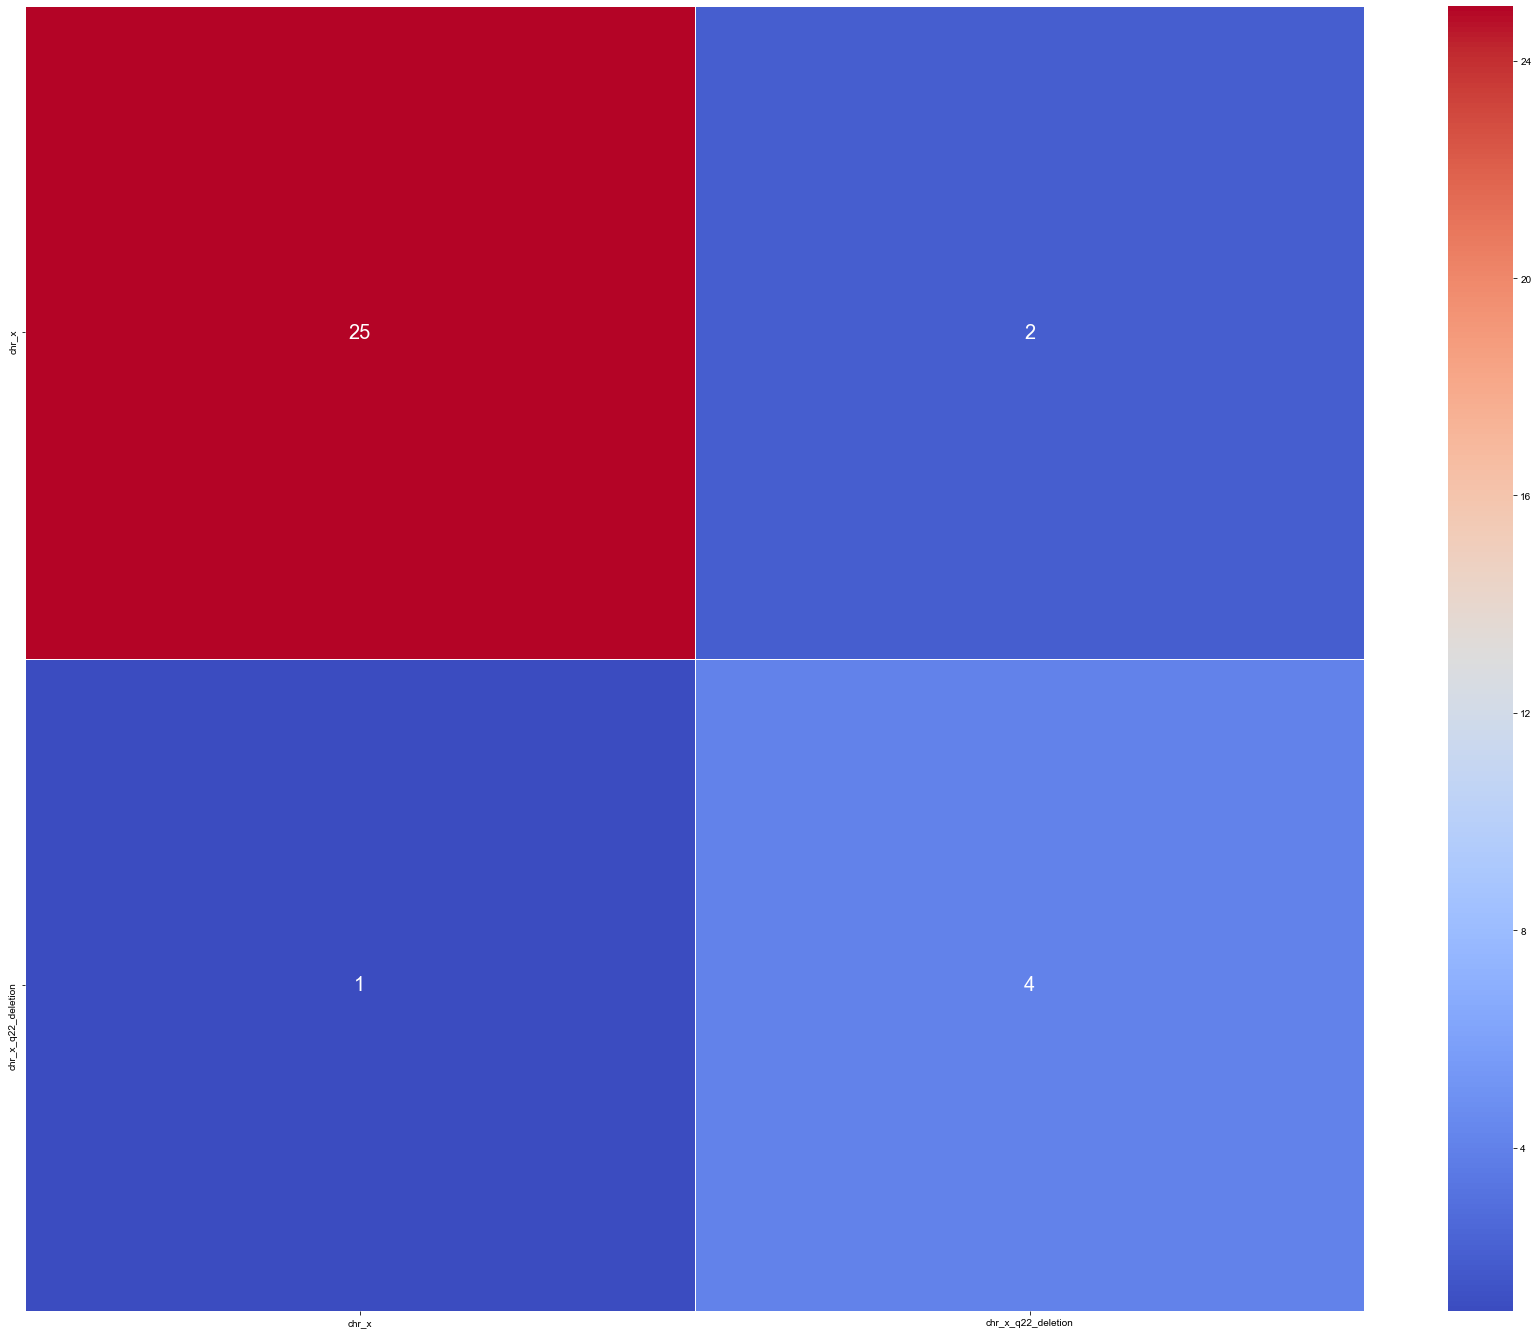

In [51]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [52]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Chr_X_Iteration_' + str(iterationNumber) + '.png', dpi=400)

### 3.10.4. ROC

In [53]:
y_predict

array([[9.9999964e-01, 2.4811399e-07],
       [9.9985993e-01, 1.3727700e-05],
       [9.9997902e-01, 2.2385322e-05],
       [1.0000000e+00, 8.2771918e-20],
       [1.0000000e+00, 1.2919858e-10],
       [1.0000000e+00, 1.2987443e-12],
       [1.0000000e+00, 6.3203779e-18],
       [1.0000000e+00, 8.7507590e-10],
       [1.0000000e+00, 6.8798678e-13],
       [1.0000000e+00, 7.8534240e-18],
       [1.0000000e+00, 4.7852390e-16],
       [9.9627787e-01, 5.6437333e-03],
       [9.9999833e-01, 4.6215196e-06],
       [1.0000000e+00, 4.3689594e-16],
       [2.3687169e-01, 6.5872276e-01],
       [1.0000000e+00, 1.5023502e-10],
       [9.9998546e-01, 1.9693669e-05],
       [9.9973017e-01, 9.4268878e-05],
       [9.9999952e-01, 9.8947211e-08],
       [4.4899237e-01, 3.4767830e-01],
       [1.0000000e+00, 1.5363394e-09],
       [9.9980778e-01, 1.9980874e-04],
       [9.9930131e-01, 6.1498018e-04],
       [1.0000000e+00, 4.1785636e-08],
       [3.9535113e-02, 9.5276725e-01],
       [1.0000000e+00, 6.

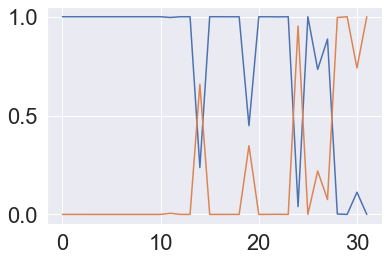

In [54]:
plt.plot(y_predict)

In [55]:
y_predict_1D = y_predict[:,0]

In [56]:
y_predict_1D_processed = 1- y_predict_1D

In [57]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [58]:
auc_rf

0.962962962962963

In [59]:
x = y = np.arange(0,1.1,0.1)

In [60]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

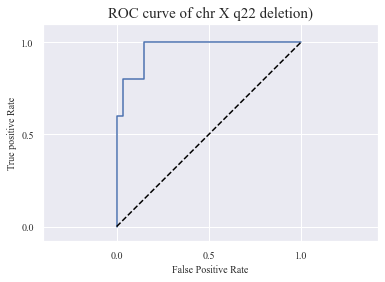

In [61]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of chr X q22 deletion)', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_X_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [62]:
auc_value = auc(fpr, tpr)

In [63]:
print('AUC is ', auc_value)

AUC is  0.962962962962963


# Results

In [64]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.906


In [65]:
print(performanceReport)

                    precision    recall  f1-score   support

             chr_x       0.96      0.93      0.94        27
chr_x_q22_deletion       0.67      0.80      0.73         5

         micro avg       0.91      0.91      0.91        32
         macro avg       0.81      0.86      0.84        32
      weighted avg       0.92      0.91      0.91        32



In [66]:
type(performanceReport)

str

In [67]:
confusion

,chr_x,chr_x_q22_deletion
chr_x,25,2
chr_x_q22_deletion,1,4


In [68]:
print('AUC is ', auc_value)

AUC is  0.962962962962963


## Export to a text file

In [69]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()